# JupyterLite で学ぶ scipy.stats 初級チュートリアル

このノートブックは、**JupyterLite（ブラウザだけで動く Jupyter 環境）** 上で、
Python の統計ライブラリ **scipy.stats** の基礎を学ぶためのチュートリアルです。

## 対象者
- Python と NumPy の基本を理解している方
- 統計学の基礎（平均、分散、確率分布など）を学びたい方
- scipy.stats を初めて使う方

## このチュートリアルで学ぶこと
1. scipy.stats の概要
2. 基本統計量の計算
3. 確率分布（離散分布）
4. 確率分布（連続分布）
5. 正規分布の詳細
6. t分布とカイ二乗分布
7. 乱数生成
8. 確率分布のフィッティング

## 0. 環境準備（JupyterLite 用）

まず、必要なライブラリをインストールします。

In [1]:
try:
    import piplite
    await piplite.install(["numpy", "pandas", "matplotlib", "scipy", "japanize-matplotlib-jlite"])
except ImportError:
    pass

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import japanize_matplotlib_jlite

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100
np.random.seed(42)

print(f"scipy バージョン: {stats.__name__}")

scipy バージョン: scipy.stats


---
## 1. scipy.stats の概要

**scipy.stats** は、Python で統計計算を行うための包括的なモジュールです。

### 主な機能
- **確率分布**: 80種類以上の確率分布（正規分布、t分布、カイ二乗分布など）
- **統計検定**: t検定、カイ二乗検定、相関検定など
- **記述統計**: 平均、分散、歪度、尖度など
- **乱数生成**: 各種確率分布からのサンプリング

### 1.1 利用可能な分布の確認

In [3]:
# 連続分布の一部
print("連続分布の例:")
continuous_dists = ['norm', 't', 'chi2', 'f', 'expon', 'uniform', 'gamma', 'beta']
for dist in continuous_dists:
    print(f"  - {dist}: {getattr(stats, dist).name}")

連続分布の例:
  - norm: norm
  - t: t
  - chi2: chi2
  - f: f
  - expon: expon
  - uniform: uniform
  - gamma: gamma
  - beta: beta


In [4]:
# 離散分布の一部
print("離散分布の例:")
discrete_dists = ['binom', 'poisson', 'geom', 'hypergeom']
for dist in discrete_dists:
    print(f"  - {dist}: {getattr(stats, dist).name}")

離散分布の例:
  - binom: binom
  - poisson: poisson
  - geom: geom
  - hypergeom: hypergeom


---
## 2. 基本統計量の計算

scipy.stats には、記述統計量を計算するための関数が用意されています。

### 2.1 サンプルデータの作成

In [5]:
# テストの点数データ（100人分）
np.random.seed(42)
scores = np.random.normal(loc=65, scale=15, size=100).clip(0, 100)

print(f"データ数: {len(scores)}")
print(f"最初の10個: {scores[:10].round(1)}")

データ数: 100
最初の10個: [72.5 62.9 74.7 87.8 61.5 61.5 88.7 76.5 58.  73.1]


### 2.2 基本統計量

In [6]:
# 基本統計量
print("=== 基本統計量 ===")
print(f"平均 (mean): {np.mean(scores):.2f}")
print(f"中央値 (median): {np.median(scores):.2f}")
print(f"標準偏差 (std): {np.std(scores, ddof=1):.2f}")  # ddof=1 で不偏標準偏差
print(f"分散 (var): {np.var(scores, ddof=1):.2f}")
print(f"最小値: {np.min(scores):.2f}")
print(f"最大値: {np.max(scores):.2f}")

=== 基本統計量 ===
平均 (mean): 63.44
中央値 (median): 63.10
標準偏差 (std): 13.62
分散 (var): 185.57
最小値: 25.70
最大値: 92.78


### 2.3 scipy.stats.describe()

In [7]:
# describe() で一括取得
result = stats.describe(scores)

print("=== stats.describe() の結果 ===")
print(f"データ数 (nobs): {result.nobs}")
print(f"最小値・最大値 (minmax): {result.minmax[0]:.2f}, {result.minmax[1]:.2f}")
print(f"平均 (mean): {result.mean:.2f}")
print(f"分散 (variance): {result.variance:.2f}")
print(f"歪度 (skewness): {result.skewness:.2f}")
print(f"尖度 (kurtosis): {result.kurtosis:.2f}")

=== stats.describe() の結果 ===
データ数 (nobs): 100
最小値・最大値 (minmax): 25.70, 92.78
平均 (mean): 63.44
分散 (variance): 185.57
歪度 (skewness): -0.18
尖度 (kurtosis): -0.16


### 2.4 歪度と尖度

- **歪度（Skewness）**: 分布の非対称性を表す
  - 正の値: 右に裾が長い（右歪み）
  - 負の値: 左に裾が長い（左歪み）
  - 0: 対称

- **尖度（Kurtosis）**: 分布の尖り具合を表す
  - 正の値: 正規分布より尖っている
  - 負の値: 正規分布より平坦
  - 0: 正規分布と同程度

In [8]:
# 個別に計算
print(f"歪度: {stats.skew(scores):.3f}")
print(f"尖度: {stats.kurtosis(scores):.3f}")

歪度: -0.175
尖度: -0.155


### 2.5 パーセンタイル

In [9]:
# パーセンタイル
print("=== パーセンタイル ===")
for p in [25, 50, 75, 90, 95]:
    print(f"{p}パーセンタイル: {np.percentile(scores, p):.2f}")

# 四分位範囲（IQR）
iqr = stats.iqr(scores)
print(f"\n四分位範囲 (IQR): {iqr:.2f}")

=== パーセンタイル ===
25パーセンタイル: 55.99
50パーセンタイル: 63.10
75パーセンタイル: 71.09
90パーセンタイル: 80.09
95パーセンタイル: 87.20

四分位範囲 (IQR): 15.10


### 2.6 標準誤差

In [10]:
# 標準誤差（Standard Error of Mean）
sem = stats.sem(scores)
print(f"標準誤差 (SEM): {sem:.3f}")
print(f"（手計算: std / sqrt(n) = {np.std(scores, ddof=1) / np.sqrt(len(scores)):.3f}）")

標準誤差 (SEM): 1.362
（手計算: std / sqrt(n) = 1.362）


### 📝 2章 練習問題

1. 自分でデータを作成し、`stats.describe()` で統計量を確認しなさい。
2. 右に歪んだ分布のデータを作成し、歪度が正の値になることを確認しなさい。
3. 95パーセンタイルの意味を説明しなさい。

In [11]:
# 練習問題の解答欄



---
## 3. 確率分布（離散分布）

離散分布は、取りうる値が整数などの離散的な値である確率分布です。

### 3.1 二項分布（Binomial Distribution）

n回の試行で成功確率pの事象が何回起こるかを表す分布。

例：コインを10回投げて表が出る回数

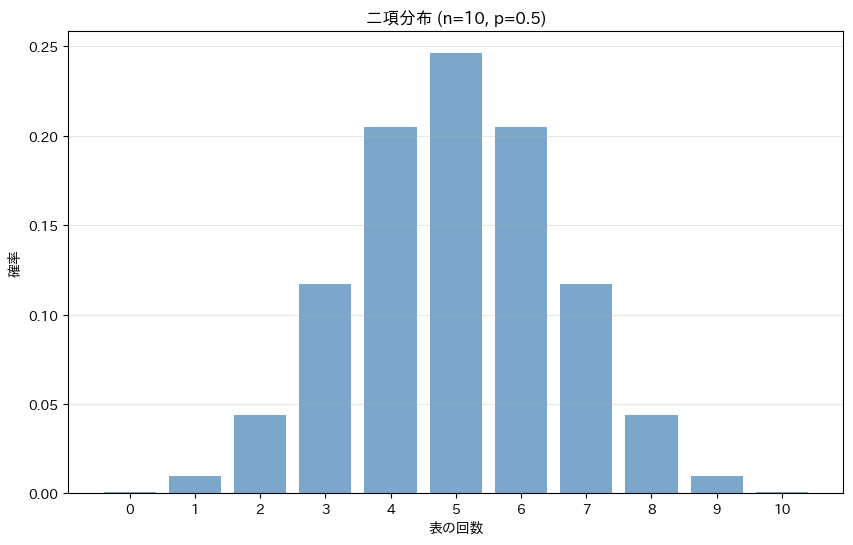

平均: 5.00
分散: 2.50


In [12]:
# 二項分布: n=10, p=0.5（公平なコイン）
n, p = 10, 0.5
binom_dist = stats.binom(n=n, p=p)

# 確率質量関数（PMF）
x = np.arange(0, n + 1)
pmf = binom_dist.pmf(x)

plt.bar(x, pmf, color='steelblue', alpha=0.7)
plt.xlabel('表の回数')
plt.ylabel('確率')
plt.title(f'二項分布 (n={n}, p={p})')
plt.xticks(x)
plt.grid(axis='y', alpha=0.3)
plt.show()

print(f"平均: {binom_dist.mean():.2f}")
print(f"分散: {binom_dist.var():.2f}")

### 3.2 離散分布の主なメソッド

| メソッド | 説明 |
|---------|------|
| `pmf(k)` | 確率質量関数: P(X = k) |
| `cdf(k)` | 累積分布関数: P(X ≤ k) |
| `ppf(q)` | パーセント点関数（累積分布の逆関数）|
| `rvs(size)` | 乱数生成 |
| `mean()` | 平均 |
| `var()` | 分散 |

In [13]:
# 各メソッドの使用例
print("=== 二項分布のメソッド ===")
print(f"P(X = 5): {binom_dist.pmf(5):.4f}")  # ちょうど5回表が出る確率
print(f"P(X ≤ 5): {binom_dist.cdf(5):.4f}")  # 5回以下表が出る確率
print(f"P(X ≥ 6): {1 - binom_dist.cdf(5):.4f}")  # 6回以上表が出る確率
print(f"中央値（50パーセンタイル）: {binom_dist.ppf(0.5):.0f}")

=== 二項分布のメソッド ===
P(X = 5): 0.2461
P(X ≤ 5): 0.6230
P(X ≥ 6): 0.3770
中央値（50パーセンタイル）: 5


### 3.3 ポアソン分布（Poisson Distribution）

単位時間（または単位面積）あたりの事象発生回数を表す分布。

例：1時間あたりのコールセンターへの電話回数

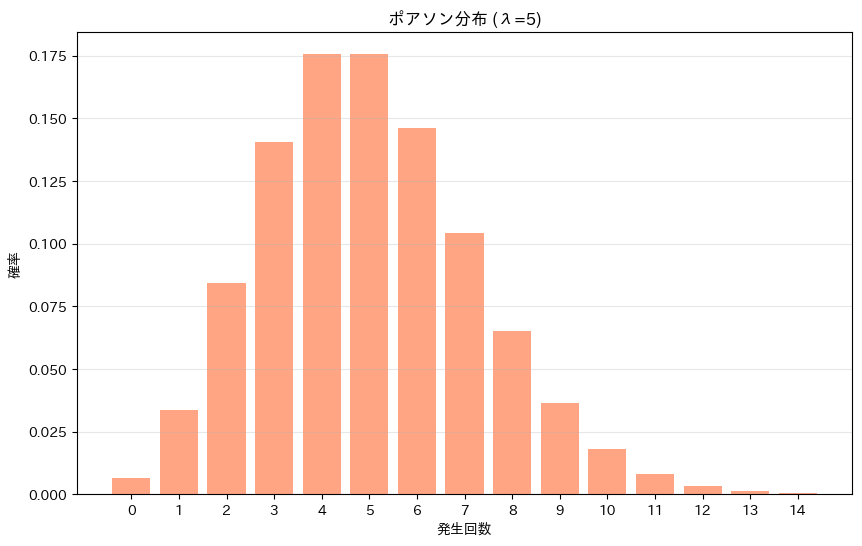

平均: 5.00
分散: 5.00


In [14]:
# ポアソン分布: λ=5（平均5回）
mu = 5
poisson_dist = stats.poisson(mu=mu)

x = np.arange(0, 15)
pmf = poisson_dist.pmf(x)

plt.bar(x, pmf, color='coral', alpha=0.7)
plt.xlabel('発生回数')
plt.ylabel('確率')
plt.title(f'ポアソン分布 (λ={mu})')
plt.xticks(x)
plt.grid(axis='y', alpha=0.3)
plt.show()

print(f"平均: {poisson_dist.mean():.2f}")
print(f"分散: {poisson_dist.var():.2f}")

### 3.4 pの異なる二項分布の比較

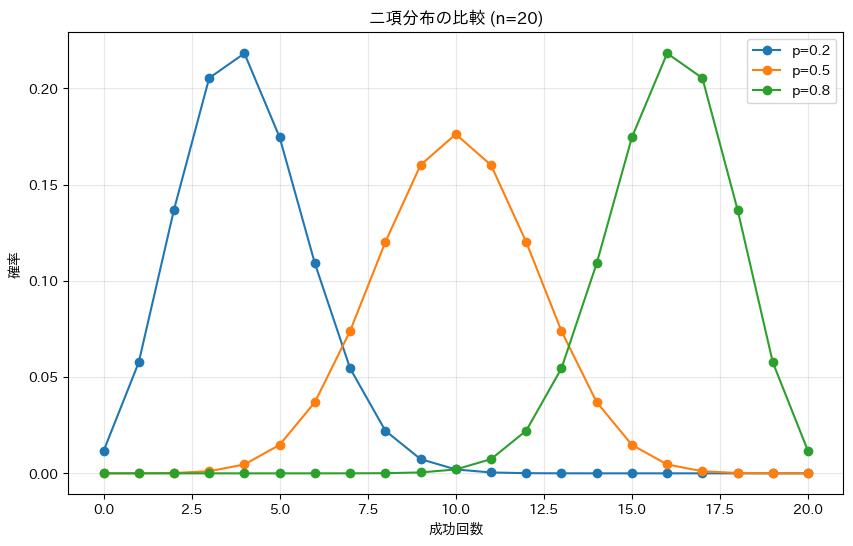

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

n = 20
x = np.arange(0, n + 1)

for p in [0.2, 0.5, 0.8]:
    pmf = stats.binom.pmf(x, n, p)
    ax.plot(x, pmf, 'o-', label=f'p={p}')

ax.set_xlabel('成功回数')
ax.set_ylabel('確率')
ax.set_title(f'二項分布の比較 (n={n})')
ax.legend()
ax.grid(alpha=0.3)
plt.show()

### 📝 3章 練習問題

1. サイコロを10回振って、6が出る回数の分布を二項分布で表しなさい（p=1/6）。
2. 1時間に平均3件の注文が来るとき、5件以上注文が来る確率をポアソン分布で計算しなさい。
3. 二項分布とポアソン分布の違いを説明しなさい。

In [16]:
# 練習問題の解答欄



---
## 4. 確率分布（連続分布）

連続分布は、取りうる値が連続的な実数である確率分布です。

### 4.1 一様分布（Uniform Distribution）

指定された範囲内のすべての値が等確率で出現する分布。

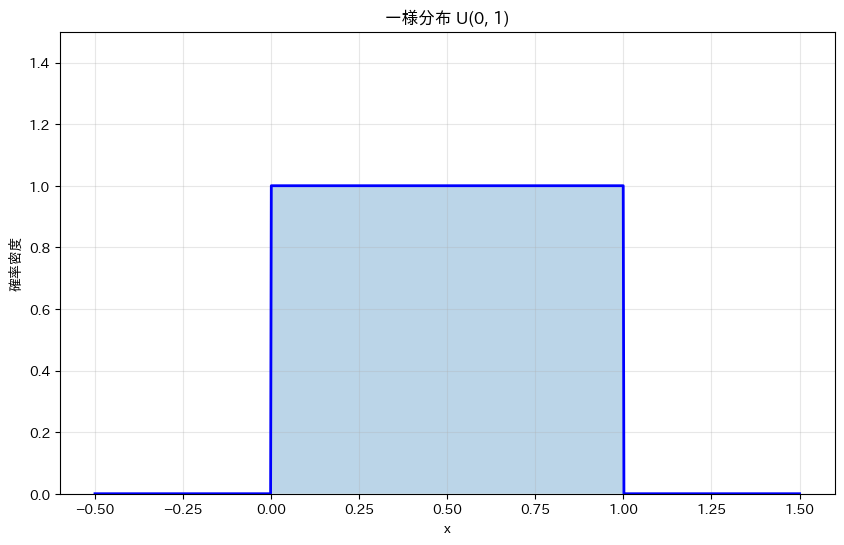

平均: 0.50
分散: 0.0833


In [17]:
# 一様分布: [0, 1]
uniform_dist = stats.uniform(loc=0, scale=1)  # loc=開始点, scale=幅

x = np.linspace(-0.5, 1.5, 1000)
pdf = uniform_dist.pdf(x)

plt.plot(x, pdf, 'b-', linewidth=2)
plt.fill_between(x, pdf, alpha=0.3)
plt.xlabel('x')
plt.ylabel('確率密度')
plt.title('一様分布 U(0, 1)')
plt.ylim(0, 1.5)
plt.grid(alpha=0.3)
plt.show()

print(f"平均: {uniform_dist.mean():.2f}")
print(f"分散: {uniform_dist.var():.4f}")

### 4.2 連続分布の主なメソッド

| メソッド | 説明 |
|---------|------|
| `pdf(x)` | 確率密度関数: f(x) |
| `cdf(x)` | 累積分布関数: P(X ≤ x) |
| `ppf(q)` | パーセント点関数（累積分布の逆関数）|
| `sf(x)` | 生存関数: P(X > x) = 1 - cdf(x) |
| `rvs(size)` | 乱数生成 |
| `mean()` | 平均 |
| `var()` | 分散 |
| `interval(alpha)` | 信頼区間 |

### 4.3 指数分布（Exponential Distribution）

事象が発生するまでの待ち時間を表す分布。

例：次の顧客が来るまでの待ち時間

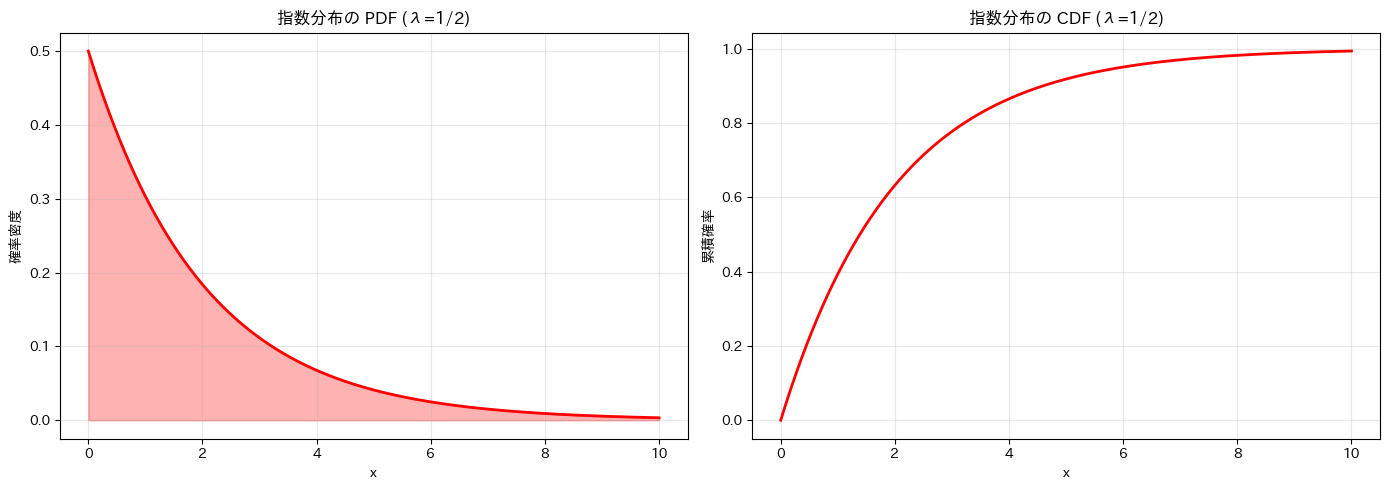

平均: 2.00
分散: 4.00


In [18]:
# 指数分布: λ=0.5（平均待ち時間=2）
scale = 2  # 1/λ
expon_dist = stats.expon(scale=scale)

x = np.linspace(0, 10, 1000)
pdf = expon_dist.pdf(x)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PDF
axes[0].plot(x, pdf, 'r-', linewidth=2)
axes[0].fill_between(x, pdf, alpha=0.3, color='red')
axes[0].set_xlabel('x')
axes[0].set_ylabel('確率密度')
axes[0].set_title(f'指数分布の PDF (λ=1/{scale})')
axes[0].grid(alpha=0.3)

# CDF
cdf = expon_dist.cdf(x)
axes[1].plot(x, cdf, 'r-', linewidth=2)
axes[1].set_xlabel('x')
axes[1].set_ylabel('累積確率')
axes[1].set_title(f'指数分布の CDF (λ=1/{scale})')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"平均: {expon_dist.mean():.2f}")
print(f"分散: {expon_dist.var():.2f}")

### 4.4 ガンマ分布（Gamma Distribution）

指数分布の一般化。α回の事象が発生するまでの待ち時間。

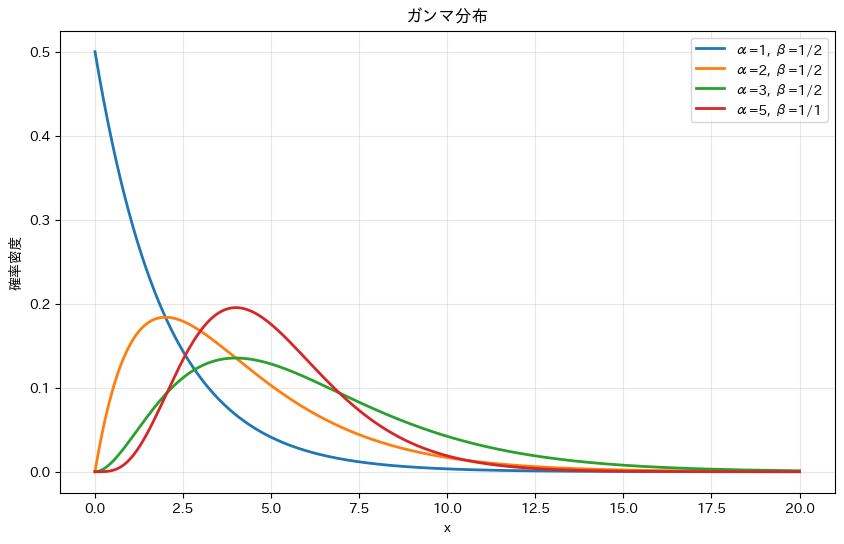

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))

x = np.linspace(0, 20, 1000)

# 異なるパラメータのガンマ分布
params = [(1, 2), (2, 2), (3, 2), (5, 1)]  # (a=shape, scale)

for a, scale in params:
    pdf = stats.gamma.pdf(x, a=a, scale=scale)
    ax.plot(x, pdf, linewidth=2, label=f'α={a}, β=1/{scale}')

ax.set_xlabel('x')
ax.set_ylabel('確率密度')
ax.set_title('ガンマ分布')
ax.legend()
ax.grid(alpha=0.3)
plt.show()

### 📝 4章 練習問題

1. 一様分布 U(10, 20) を作成し、PDF を描画しなさい。
2. 平均待ち時間が5分の指数分布で、10分以内に顧客が来る確率を計算しなさい。
3. 連続分布の PDF と CDF の関係を説明しなさい。

In [20]:
# 練習問題の解答欄



---
## 5. 正規分布の詳細

**正規分布（ガウス分布）** は、統計学で最も重要な分布です。

### 5.1 標準正規分布

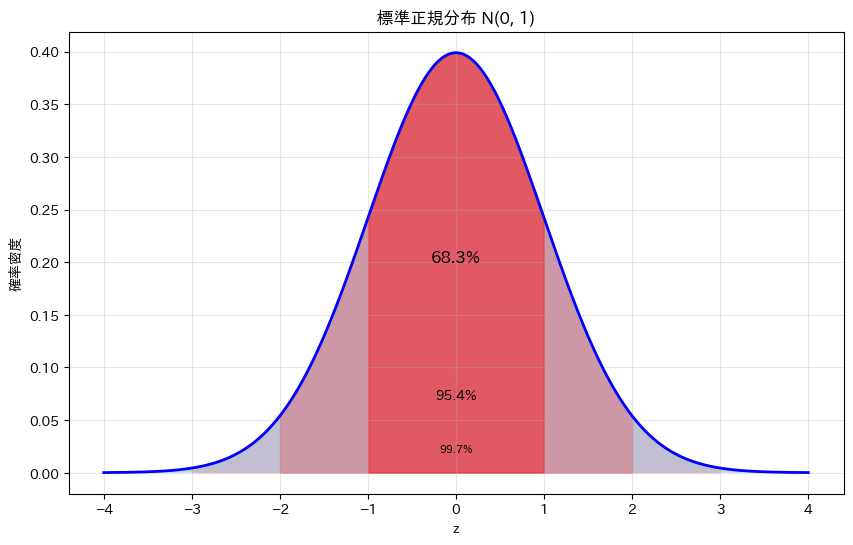

In [21]:
# 標準正規分布: μ=0, σ=1
norm_dist = stats.norm(loc=0, scale=1)

x = np.linspace(-4, 4, 1000)
pdf = norm_dist.pdf(x)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, pdf, 'b-', linewidth=2)
ax.fill_between(x, pdf, alpha=0.3)

# 標準偏差の範囲を示す
for sigma, alpha in [(1, 0.4), (2, 0.2), (3, 0.1)]:
    mask = (x >= -sigma) & (x <= sigma)
    ax.fill_between(x[mask], pdf[mask], alpha=alpha, color='red')

ax.set_xlabel('z')
ax.set_ylabel('確率密度')
ax.set_title('標準正規分布 N(0, 1)')
ax.grid(alpha=0.3)

# 凡例用のテキスト
ax.text(0, 0.2, '68.3%', ha='center', fontsize=12)
ax.text(0, 0.07, '95.4%', ha='center', fontsize=10)
ax.text(0, 0.02, '99.7%', ha='center', fontsize=8)

plt.show()

### 5.2 正規分布の重要な性質

| 範囲 | 確率 |
|------|------|
| μ ± 1σ | 約 68.3% |
| μ ± 2σ | 約 95.4% |
| μ ± 3σ | 約 99.7% |

In [22]:
# 正規分布の確率計算
print("=== 正規分布の確率 ===")
for sigma in [1, 2, 3]:
    prob = norm_dist.cdf(sigma) - norm_dist.cdf(-sigma)
    print(f"P(-{sigma} ≤ Z ≤ {sigma}): {prob*100:.2f}%")

=== 正規分布の確率 ===
P(-1 ≤ Z ≤ 1): 68.27%
P(-2 ≤ Z ≤ 2): 95.45%
P(-3 ≤ Z ≤ 3): 99.73%


### 5.3 平均と標準偏差の異なる正規分布

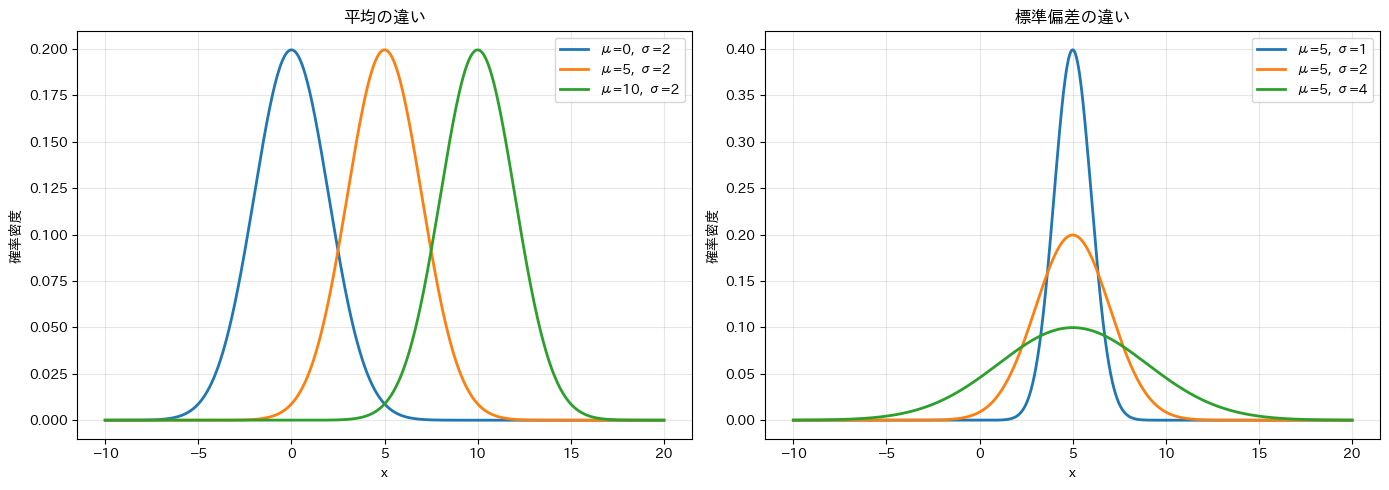

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x = np.linspace(-10, 20, 1000)

# 平均の違い
for mu in [0, 5, 10]:
    pdf = stats.norm.pdf(x, loc=mu, scale=2)
    axes[0].plot(x, pdf, linewidth=2, label=f'μ={mu}, σ=2')

axes[0].set_xlabel('x')
axes[0].set_ylabel('確率密度')
axes[0].set_title('平均の違い')
axes[0].legend()
axes[0].grid(alpha=0.3)

# 標準偏差の違い
for sigma in [1, 2, 4]:
    pdf = stats.norm.pdf(x, loc=5, scale=sigma)
    axes[1].plot(x, pdf, linewidth=2, label=f'μ=5, σ={sigma}')

axes[1].set_xlabel('x')
axes[1].set_ylabel('確率密度')
axes[1].set_title('標準偏差の違い')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 5.4 Z値の計算と確率

In [24]:
# テストの点数の例
mu, sigma = 60, 15  # 平均60点、標準偏差15点
score = 80  # ある生徒の点数

# Z値の計算
z = (score - mu) / sigma
print(f"点数 {score} の Z値: {z:.2f}")

# この点数以上を取る確率
prob_above = 1 - stats.norm.cdf(z)
print(f"{score}点以上を取る確率: {prob_above*100:.2f}%")

# 上位何%か
percentile = stats.norm.cdf(z) * 100
print(f"上位 {100 - percentile:.1f}%")

点数 80 の Z値: 1.33
80点以上を取る確率: 9.12%
上位 9.1%


### 5.5 パーセント点（臨界値）

In [25]:
# よく使う臨界値
print("=== 標準正規分布の臨界値 ===")
for alpha in [0.10, 0.05, 0.01]:
    z_two_tail = stats.norm.ppf(1 - alpha/2)
    z_one_tail = stats.norm.ppf(1 - alpha)
    print(f"α={alpha}: 両側={z_two_tail:.3f}, 片側={z_one_tail:.3f}")

=== 標準正規分布の臨界値 ===
α=0.1: 両側=1.645, 片側=1.282
α=0.05: 両側=1.960, 片側=1.645
α=0.01: 両側=2.576, 片側=2.326


### 📝 5章 練習問題

1. 平均170cm、標準偏差6cmの身長分布で、180cm以上の人の割合を計算しなさい。
2. 上記の分布で、上位10%に入るための身長を計算しなさい。
3. Z値が-2.0のとき、それより小さい値を取る確率を計算しなさい。

In [26]:
# 練習問題の解答欄



---
## 6. t分布とカイ二乗分布

統計検定で重要な分布を学びます。

### 6.1 t分布（Student's t-distribution）

母分散が未知のときの平均の検定に使用。
自由度が大きくなると正規分布に近づく。

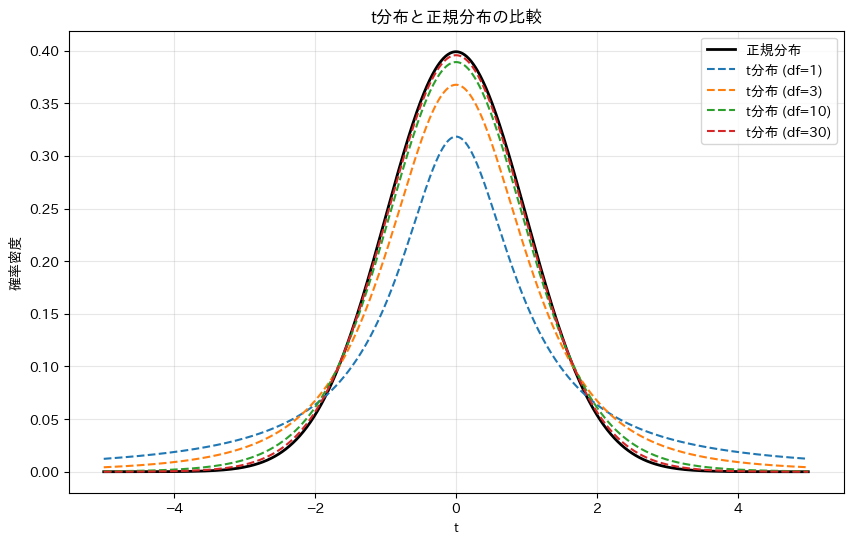

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))

x = np.linspace(-5, 5, 1000)

# 正規分布
ax.plot(x, stats.norm.pdf(x), 'k-', linewidth=2, label='正規分布')

# t分布（異なる自由度）
for df in [1, 3, 10, 30]:
    pdf = stats.t.pdf(x, df=df)
    ax.plot(x, pdf, '--', linewidth=1.5, label=f't分布 (df={df})')

ax.set_xlabel('t')
ax.set_ylabel('確率密度')
ax.set_title('t分布と正規分布の比較')
ax.legend()
ax.grid(alpha=0.3)
plt.show()

In [28]:
# t分布の臨界値
print("=== t分布の臨界値（両側5%点）===")
for df in [5, 10, 20, 30, 100]:
    t_crit = stats.t.ppf(0.975, df=df)
    print(f"df={df:3d}: t = {t_crit:.3f}")

print(f"正規分布: z = {stats.norm.ppf(0.975):.3f}")

=== t分布の臨界値（両側5%点）===
df=  5: t = 2.571
df= 10: t = 2.228
df= 20: t = 2.086
df= 30: t = 2.042
df=100: t = 1.984
正規分布: z = 1.960


### 6.2 カイ二乗分布（Chi-square distribution）

分散の検定や適合度検定に使用。
正規分布に従う確率変数の二乗和の分布。

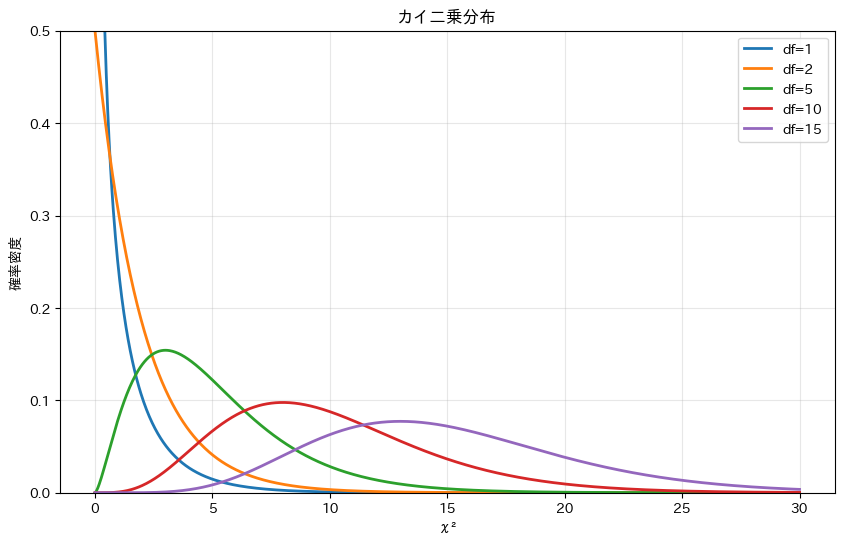

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))

x = np.linspace(0, 30, 1000)

# カイ二乗分布（異なる自由度）
for df in [1, 2, 5, 10, 15]:
    pdf = stats.chi2.pdf(x, df=df)
    ax.plot(x, pdf, linewidth=2, label=f'df={df}')

ax.set_xlabel('χ²')
ax.set_ylabel('確率密度')
ax.set_title('カイ二乗分布')
ax.legend()
ax.grid(alpha=0.3)
ax.set_ylim(0, 0.5)
plt.show()

In [30]:
# カイ二乗分布の臨界値
print("=== カイ二乗分布の臨界値（上側5%点）===")
for df in [1, 5, 10, 20]:
    chi2_crit = stats.chi2.ppf(0.95, df=df)
    print(f"df={df:2d}: χ² = {chi2_crit:.3f}")

=== カイ二乗分布の臨界値（上側5%点）===
df= 1: χ² = 3.841
df= 5: χ² = 11.070
df=10: χ² = 18.307
df=20: χ² = 31.410


### 6.3 F分布（F-distribution）

2つの分散の比の検定に使用。
分散分析（ANOVA）で重要。

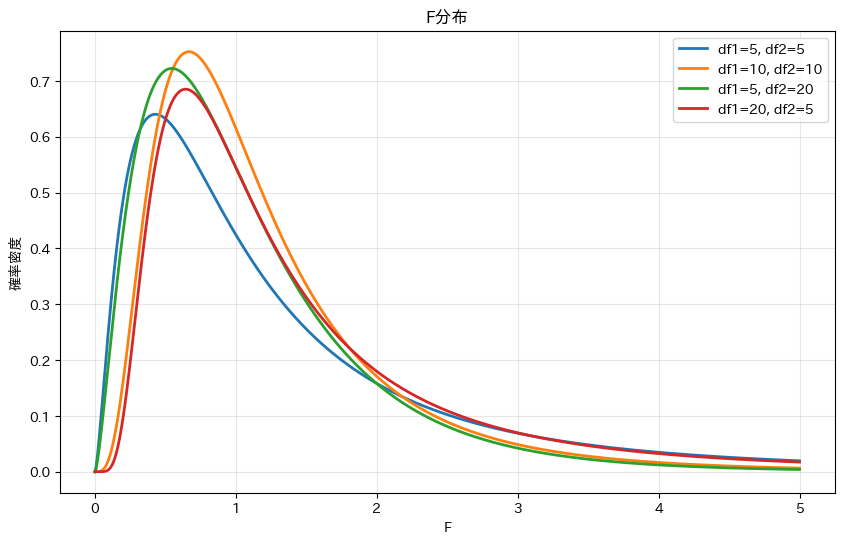

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))

x = np.linspace(0, 5, 1000)

# F分布（異なる自由度）
params = [(5, 5), (10, 10), (5, 20), (20, 5)]
for dfn, dfd in params:
    pdf = stats.f.pdf(x, dfn=dfn, dfd=dfd)
    ax.plot(x, pdf, linewidth=2, label=f'df1={dfn}, df2={dfd}')

ax.set_xlabel('F')
ax.set_ylabel('確率密度')
ax.set_title('F分布')
ax.legend()
ax.grid(alpha=0.3)
plt.show()

### 📝 6章 練習問題

1. 自由度10のt分布で、t=2.0より大きい値を取る確率を計算しなさい。
2. 自由度5のカイ二乗分布で、上側1%点を求めなさい。
3. t分布、カイ二乗分布、F分布の違いと用途を説明しなさい。

In [32]:
# 練習問題の解答欄



---
## 7. 乱数生成

確率分布からのサンプリング（乱数生成）の方法を学びます。

### 7.1 rvs() メソッド

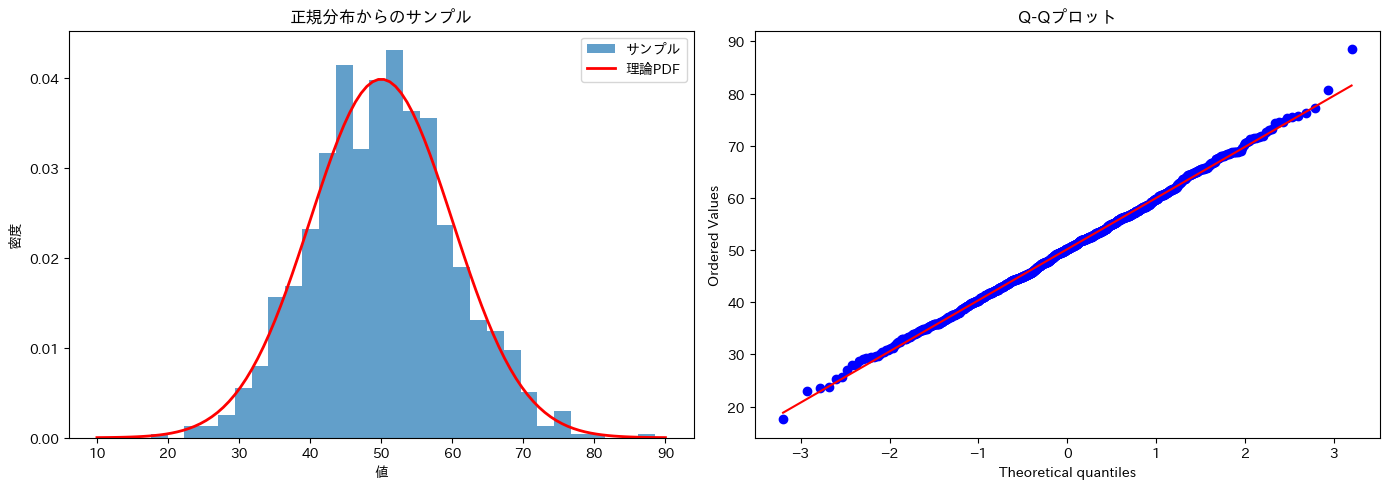

サンプル平均: 50.19 (理論値: 50)
サンプル標準偏差: 9.79 (理論値: 10)


In [33]:
# 正規分布から乱数生成
np.random.seed(42)

# 平均50、標準偏差10の正規分布から1000個サンプリング
samples = stats.norm.rvs(loc=50, scale=10, size=1000)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ヒストグラム
axes[0].hist(samples, bins=30, density=True, alpha=0.7, label='サンプル')

# 理論的なPDF
x = np.linspace(10, 90, 100)
axes[0].plot(x, stats.norm.pdf(x, loc=50, scale=10), 'r-', linewidth=2, label='理論PDF')
axes[0].set_xlabel('値')
axes[0].set_ylabel('密度')
axes[0].set_title('正規分布からのサンプル')
axes[0].legend()

# Q-Qプロット
stats.probplot(samples, dist="norm", plot=axes[1])
axes[1].set_title('Q-Qプロット')

plt.tight_layout()
plt.show()

print(f"サンプル平均: {samples.mean():.2f} (理論値: 50)")
print(f"サンプル標準偏差: {samples.std():.2f} (理論値: 10)")

### 7.2 様々な分布からの乱数

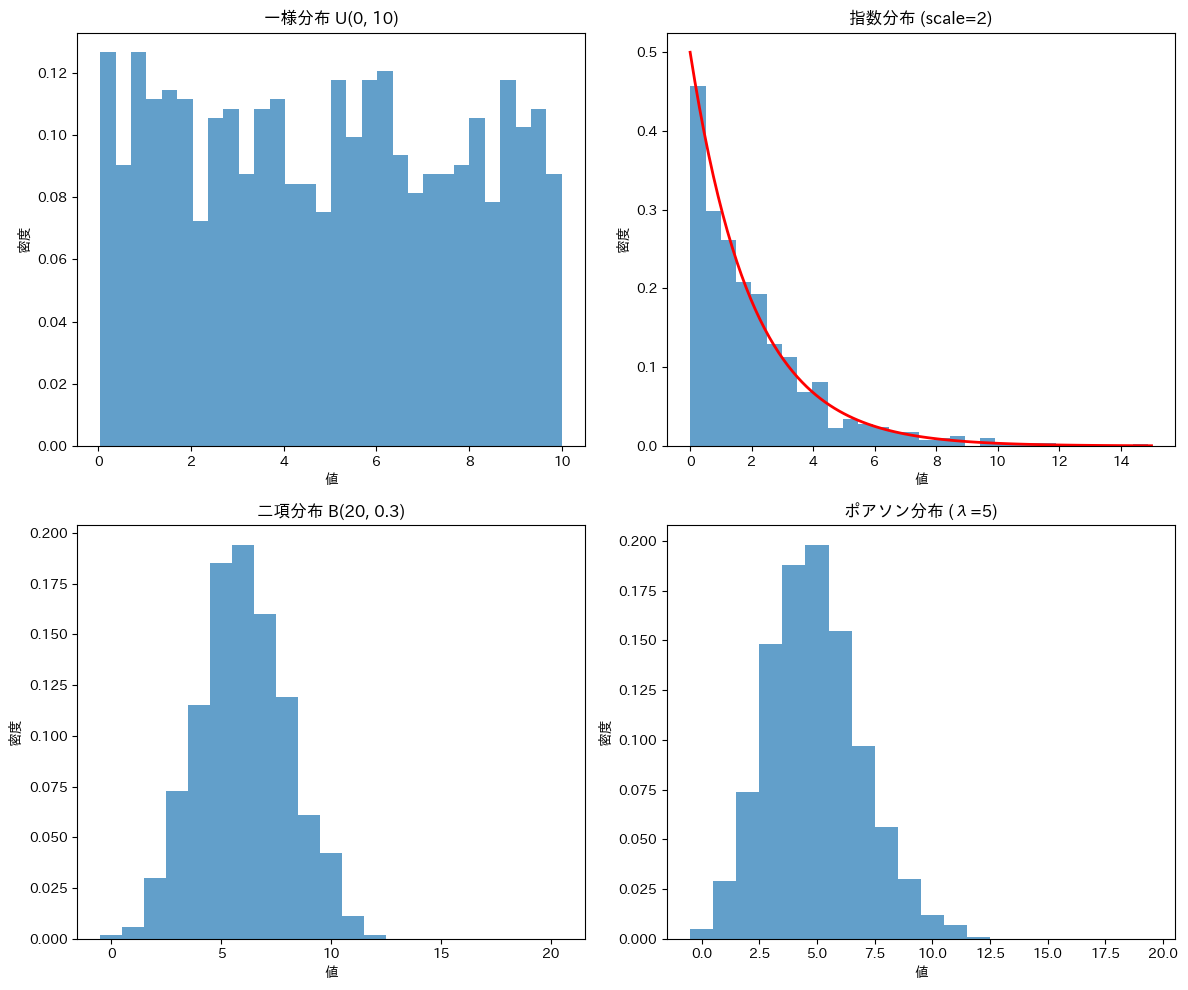

In [34]:
np.random.seed(42)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 一様分布
uniform_samples = stats.uniform.rvs(loc=0, scale=10, size=1000)
axes[0, 0].hist(uniform_samples, bins=30, density=True, alpha=0.7)
axes[0, 0].set_title('一様分布 U(0, 10)')

# 指数分布
expon_samples = stats.expon.rvs(scale=2, size=1000)
axes[0, 1].hist(expon_samples, bins=30, density=True, alpha=0.7)
x = np.linspace(0, 15, 100)
axes[0, 1].plot(x, stats.expon.pdf(x, scale=2), 'r-', linewidth=2)
axes[0, 1].set_title('指数分布 (scale=2)')

# 二項分布
binom_samples = stats.binom.rvs(n=20, p=0.3, size=1000)
axes[1, 0].hist(binom_samples, bins=np.arange(-0.5, 21.5), density=True, alpha=0.7)
axes[1, 0].set_title('二項分布 B(20, 0.3)')

# ポアソン分布
poisson_samples = stats.poisson.rvs(mu=5, size=1000)
axes[1, 1].hist(poisson_samples, bins=np.arange(-0.5, 20.5), density=True, alpha=0.7)
axes[1, 1].set_title('ポアソン分布 (λ=5)')

for ax in axes.flat:
    ax.set_xlabel('値')
    ax.set_ylabel('密度')

plt.tight_layout()
plt.show()

### 7.3 乱数のシード設定

In [35]:
# 再現性のためのシード設定
print("同じシードで生成:")
for i in range(3):
    np.random.seed(42)
    samples = stats.norm.rvs(size=5)
    print(f"  試行{i+1}: {samples.round(3)}")

print("\n異なるシードで生成:")
for seed in [1, 2, 3]:
    np.random.seed(seed)
    samples = stats.norm.rvs(size=5)
    print(f"  seed={seed}: {samples.round(3)}")

同じシードで生成:
  試行1: [ 0.497 -0.138  0.648  1.523 -0.234]
  試行2: [ 0.497 -0.138  0.648  1.523 -0.234]
  試行3: [ 0.497 -0.138  0.648  1.523 -0.234]

異なるシードで生成:
  seed=1: [ 1.624 -0.612 -0.528 -1.073  0.865]
  seed=2: [-0.417 -0.056 -2.136  1.64  -1.793]
  seed=3: [ 1.789  0.437  0.096 -1.863 -0.277]


### 📝 7章 練習問題

1. t分布（自由度10）から1000個の乱数を生成し、ヒストグラムを描きなさい。
2. 二項分布（n=100, p=0.5）から乱数を生成し、正規分布に近似できることを確認しなさい。
3. 乱数のシードを設定する意義を説明しなさい。

In [36]:
# 練習問題の解答欄



---
## 8. 確率分布のフィッティング

データに確率分布をあてはめる方法を学びます。

### 8.1 fit() メソッド

In [37]:
# データ生成
np.random.seed(42)
true_mu, true_sigma = 100, 15
data = stats.norm.rvs(loc=true_mu, scale=true_sigma, size=200)

# 正規分布をフィット
fitted_mu, fitted_sigma = stats.norm.fit(data)

print(f"真の値: μ={true_mu}, σ={true_sigma}")
print(f"推定値: μ={fitted_mu:.2f}, σ={fitted_sigma:.2f}")

真の値: μ=100, σ=15
推定値: μ=99.39, σ=13.93


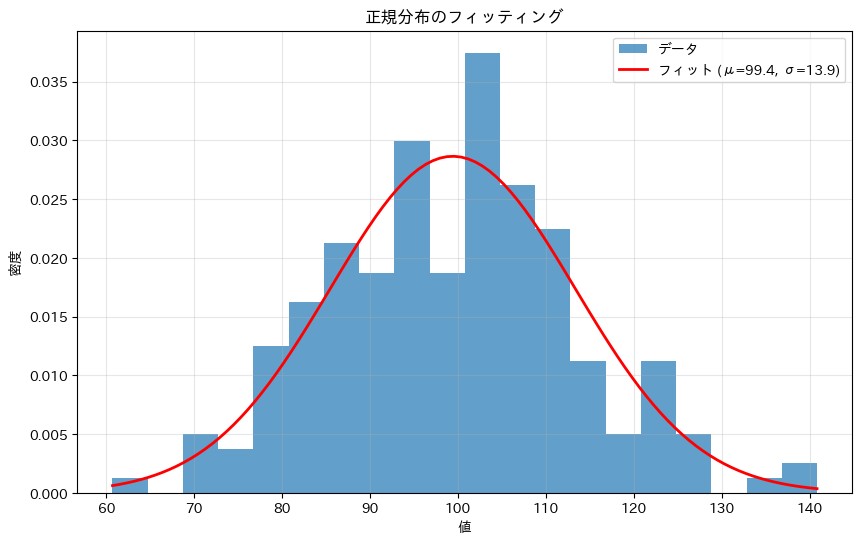

In [38]:
# フィッティング結果の可視化
fig, ax = plt.subplots(figsize=(10, 6))

# ヒストグラム
ax.hist(data, bins=20, density=True, alpha=0.7, label='データ')

# フィットした分布
x = np.linspace(data.min(), data.max(), 100)
ax.plot(x, stats.norm.pdf(x, fitted_mu, fitted_sigma), 'r-', 
        linewidth=2, label=f'フィット (μ={fitted_mu:.1f}, σ={fitted_sigma:.1f})')

ax.set_xlabel('値')
ax.set_ylabel('密度')
ax.set_title('正規分布のフィッティング')
ax.legend()
ax.grid(alpha=0.3)
plt.show()

### 8.2 様々な分布のフィッティング

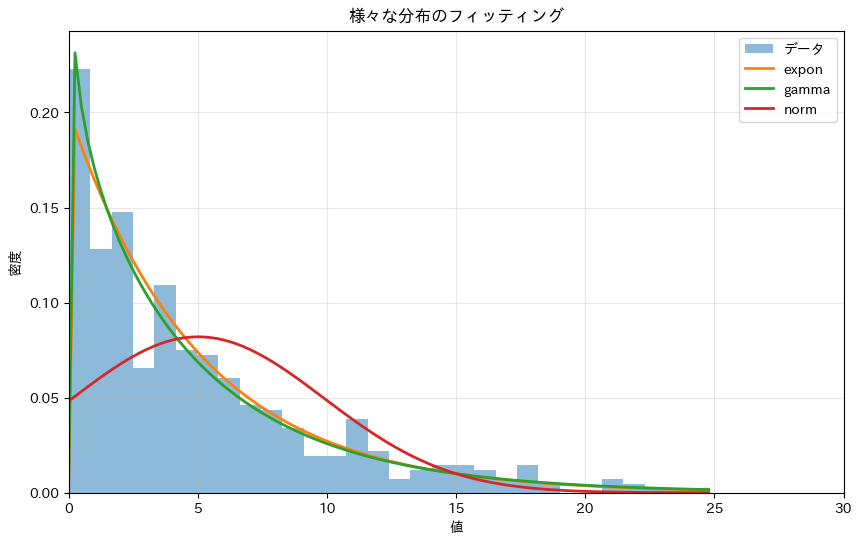

In [39]:
# 指数分布に従うデータを生成
np.random.seed(42)
exp_data = stats.expon.rvs(scale=5, size=500)

# いくつかの分布をフィット
distributions = [
    ('expon', stats.expon),
    ('gamma', stats.gamma),
    ('norm', stats.norm)
]

fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(exp_data, bins=30, density=True, alpha=0.5, label='データ')

x = np.linspace(0, exp_data.max(), 100)

for name, dist in distributions:
    params = dist.fit(exp_data)
    ax.plot(x, dist.pdf(x, *params), linewidth=2, label=f'{name}')

ax.set_xlabel('値')
ax.set_ylabel('密度')
ax.set_title('様々な分布のフィッティング')
ax.legend()
ax.grid(alpha=0.3)
ax.set_xlim(0, 30)
plt.show()

### 8.3 適合度の評価（コルモゴロフ-スミルノフ検定）

In [40]:
# データが正規分布に従うかどうかの検定
np.random.seed(42)

# 正規分布からのデータ
normal_data = stats.norm.rvs(loc=0, scale=1, size=100)

# 指数分布からのデータ
exp_data = stats.expon.rvs(scale=1, size=100)

print("=== コルモゴロフ-スミルノフ検定 ===")
print("（帰無仮説: データは標準正規分布に従う）\n")

# 正規データの検定
stat1, p1 = stats.kstest(normal_data, 'norm')
print(f"正規分布データ: 統計量={stat1:.4f}, p値={p1:.4f}")
print(f"  → {'棄却しない（正規分布と考えられる）' if p1 > 0.05 else '棄却（正規分布でない）'}")

# 指数データの検定
stat2, p2 = stats.kstest(exp_data, 'norm')
print(f"\n指数分布データ: 統計量={stat2:.4f}, p値={p2:.4f}")
print(f"  → {'棄却しない（正規分布と考えられる）' if p2 > 0.05 else '棄却（正規分布でない）'}")

=== コルモゴロフ-スミルノフ検定 ===
（帰無仮説: データは標準正規分布に従う）

正規分布データ: 統計量=0.1036, p値=0.2181
  → 棄却しない（正規分布と考えられる）

指数分布データ: 統計量=0.5020, p値=0.0000
  → 棄却（正規分布でない）


### 📝 8章 練習問題

1. ガンマ分布からデータを生成し、ガンマ分布をフィットしてパラメータを推定しなさい。
2. 2つの異なる分布をフィットし、どちらがデータによく当てはまるか比較しなさい。
3. シャピロ-ウィルク検定（`stats.shapiro`）を使って正規性を検定しなさい。

In [41]:
# 練習問題の解答欄



---
## まとめ

このチュートリアルで学んだことをまとめます：

| トピック | 主な関数/メソッド |
|---------|------------------|
| 基本統計量 | `stats.describe()`, `stats.skew()`, `stats.kurtosis()` |
| 離散分布 | `stats.binom`, `stats.poisson` |
| 連続分布 | `stats.norm`, `stats.expon`, `stats.uniform` |
| 分布メソッド | `.pdf()`, `.cdf()`, `.ppf()`, `.rvs()` |
| t分布 | `stats.t` |
| カイ二乗分布 | `stats.chi2` |
| F分布 | `stats.f` |
| フィッティング | `.fit()`, `stats.kstest()` |

## 次のステップ

初級を終えたら、**scipy.stats 中級チュートリアル** で以下を学びましょう：
- 仮説検定（t検定、カイ二乗検定など）
- 相関分析
- ノンパラメトリック検定
- 信頼区間の計算

---
## 総合演習

これまで学んだ内容を使って、以下の課題に挑戦してください。

### 課題：データの分布分析

1. **データ生成**: 平均65、標準偏差12の正規分布から200個のテスト点数データを生成しなさい。

2. **記述統計**: 平均、中央値、標準偏差、歪度、尖度を計算しなさい。

3. **可視化**: ヒストグラムと、フィットした正規分布のPDFを重ねて表示しなさい。

4. **確率計算**: 
   - 80点以上を取る確率
   - 50点以下になる確率
   - 上位10%に入るための点数

5. **正規性検定**: シャピロ-ウィルク検定でデータの正規性を確認しなさい。

In [42]:
# 総合演習の解答欄

